<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Design of experiments 
</h1>


### Pandas

https://pandas.pydata.org/

In [2]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [3]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Normalized samples</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Matrix with all samples:


In [4]:
ensaios=np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
# ao invés disso podemos usar pyDOE que auxilia a fazer planejamento fatorial

### pyDOE2

https://pypi.org/project/pyDOE2/

In [5]:
pip install pyDOE2

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pyDOE2 as doe

## Factorial planning 2²


In [7]:
ensaios=doe.ff2n(2)
# ensaios fatoriais com dois niveis

In [8]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Inserting planning in a Data Frame

In [9]:
experimento= pd.DataFrame(ensaios, columns=['Farinha','Chocolate'])

In [10]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserting columns with results 

In [11]:
# inserting portions (cupcakes quantity)
experimento['Porcoes']=[19,37,24,49]

In [12]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusion:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analizing graphically   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



https://seaborn.pydata.org

In [14]:
import seaborn as sns

In [15]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')
# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Flour ("Farinha")

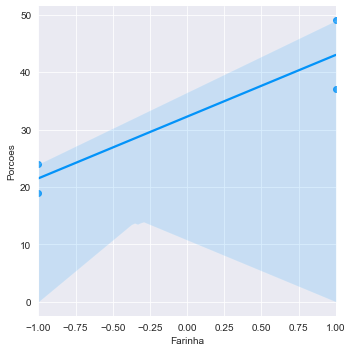

In [16]:
ax1=sns.lmplot(data=experimento, x='Farinha', y='Porcoes')
# essa sombra calcula internamente um intervalo de confianca que nao usamos aqi

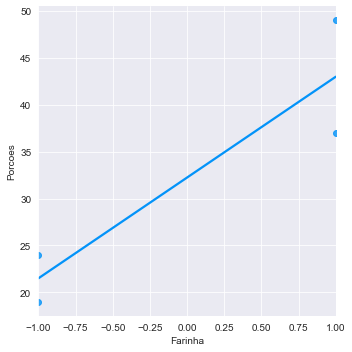

In [18]:
ax1=sns.lmplot(data=experimento, x='Farinha', y='Porcoes', ci=None)


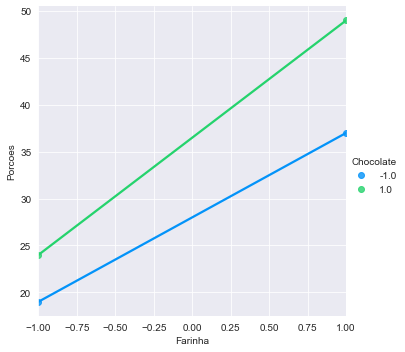

In [19]:
# quero separar esses dados em dois grupos: quando chocolate ta no nivel inferior e superior
ax1=sns.lmplot(data=experimento, x='Farinha', y='Porcoes', ci=None, hue='Chocolate')


Podemos ver que ele separou os dados entre duas linhas, essa linha verde aqui, ela mostra a quantidade de chocolate... o efeito da farinha para quando o chocolate está no nível superior e essa linha mostra o efeito da farinha quando o chocolate está no nível inferior.

A intensidade, o efeito de uma variável manipulável, ela é mensurada pela inclinação dessas retas, quanto mais inclinada tiver essa reta, maior será o efeito de uma dada variável manipulável. Analisando essas retas aqui, nós podemos ver que quando nós passamos do nível inferior para um nível superior da quantidade de chocolate, a inclinação dessa reta varia um pouco.

[07:09] Então, provavelmente, existe algum efeito de interação entre o chocolate e a farinha. Essa hipótese que nós levantamos agora, a partir, a respeito dessa possível interação, será avaliada na fase de análise estatística. Podemos ver também através desses gráficos que a farinha, ela tem um efeito positivo na quantidade de cupcakes produzidos, como é que a gente percebe isso?

[07:38] Nós percebemos que ao passar do nível inferior para o nível superior, a quantidade de cupcakes aumenta, então a farinha, ela tem um efeito diretamente proporcional o número de cupcakes produzidos. Eu gostaria de levantar apenas um ponto em relação a esse gráfico.

[08:00] Esses valores intermediários aqui, eles para o nosso caso não fazem sentido, porque a gente só tem dados em “-1” e “+1”, se há necessidade de tirar esses dados para fazer uma apresentação mais correta, nós podemos fazer isso usando o seguinte comando: ax1.set.



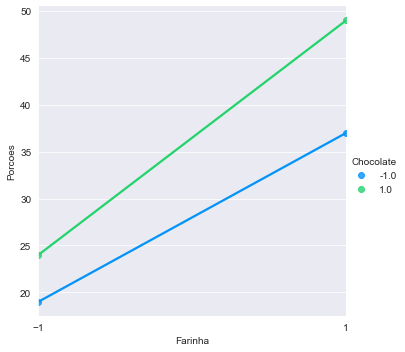

In [17]:
ax1=sns.lmplot(data=experimento, x='Farinha', y='Porcoes', ci=None, hue='Chocolate')

ax1.set(xticks=(-1,1))


[08:21] Ou seja, nós vamos definir um parâmetro para esse gráfico e nós vamos colocar xticks, que vai definir quais serão os pontos aqui no eixo horizontal que nós vamos usar e nós vamos passar uma listinha, na verdade que uma tupla com os dados que irão aparecer, então “-1” e “+1”.



### Para o chocolate

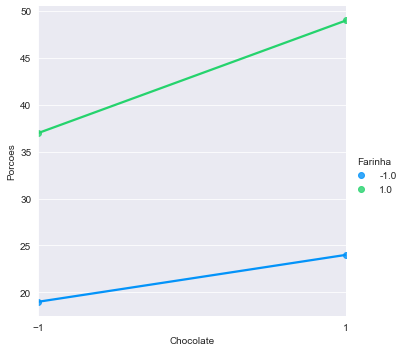

In [18]:
ax2=sns.lmplot(data=experimento,x='Chocolate', y='Porcoes',ci=None, hue='Farinha')
ax2.set(xticks=(-1,1))

[08:46] “Shift + Enter”, podemos ver que nós tiramos aqui. Vamos agora repetir o mesmo procedimento para fazer essa análise para a variação do chocolate. Vamos dar o nome desse gráfico de ax2, novamente vamos usar o lmplot para gerar o gráfico, lmplot. Vamos passar os dados experimentais que serão usados para a construção, que é o nome do nosso DataFrame, que é experimento.

[09:17] Agora, no eixo horizontal, vai aparecer o conjunto dos dados referentes ao chocolate, então nós vamos passar aqui o nome da coluna do DataFrame com o chocolate. No eixo vertical, novamente são os valores das porções, que vai ser a nossa resposta, a quantidade de cupcakes produzidos.

[10:36] Temos aqui novamente a linha verde mostrando o efeito do chocolate quando a farinha está no nível superior e nós temos aqui a linha azul para quando o efeito do chocolate, para quando a farinha está no nível inferior. Novamente, podemos notar a partir desse gráfico que há uma variação na inclinação dessas retas, então provavelmente tem algum efeito de interação entre elas.

[11:06] Podemos notar também que o efeito do chocolate na quantidade de cupcakes produzidos, ele é diretamente proporcional, ou seja, quando nós passamos do nível inferior da quantidade de chocolate, para o nível superior, a quantidade de cupcakes produzidos, ela aumenta, então a gente tem uma relação positiva entre o chocolate e o número de porções produzidas.

[11:32] O interessante agora é nós avaliarmos esse gráfico um do lado do outro, para comparar esses dois gráficos, vamos ir aqui para uma... eu coloquei eles aqui, um do lado do outro. Então vamos analisar aqui. Então, aqui nesse lado, nós temos a farinhas, os gráficos referentes à farinha e aqui o efeito do chocolate.

[11:52] Nós podemos ver a partir da inclinação das retas entre esses dois gráficos, que o efeito da variação da farinha, ela tem um maior impacto no número de cupcakes produzidos. Então, provavelmente, a farinha, ela tem uma maior importância na definição do número de cupcakes que serão produzidos ao final de uma receita.

[12:19] Então, a partir dessa análise, nós temos duas grandes hipóteses através da comparação entre esses gráficos. A primeira, que há provavelmente um efeito de interação entre a farinha e o chocolate e segundo, que a farinha, ela possui maior influência na quantidade de cupcakes produzidos.

[12:40] Nós precisamos agora confirmar essas duas hipóteses e para isso, nós faremos a construção de um modelo, como isso será feito? Será feito na próxima, no nosso próximo vídeo. Até mais.

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

Vendo os ultimos dois graficos, parece que o efeito da variaccao da farinha tem um maior impacto no numero de cupcakes produzidos, parece que a farinha tem maior importancia. Temos duas hipoteses ao ver esses graficos: parece que ha um efeito de interacao entre farinha e chocolate e segundo: farinha possui maior influencia na quantidade de cupcakes produzidos. Vamos testar essas hipoteses.

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


P = porcoes

o que que é esse intercepto? Ele nada mais diz, que a média das respostas experimentais que nós objetivos ao longo do nosso estudo, ou seja, se pegarmos aqueles quatro ensaios, pegarmos naquela coluna as respostas, somarmos e tirarmos a média daqueles valores, vai ser o valor do intercepto.

### Bibliotecas  Stats Model


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [20]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [21]:
modelo_ajustado= modelo.fit()

In [22]:
print(modelo_ajustado.summary())
# intercepto: a media de cupcakes feitos nos 4 ensaios
# efeito da Farinha é maior do que Chocolate e da interacao
# temos que availiar a significancia do coeff

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Jul 2021   Prob (F-statistic):                nan
Time:                        21:07:44   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

C:\Users\Ribeiro\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Ribeiro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Ribeiro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Ribeiro\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Ribeiro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalar

Github: https://github.com/vctgeraldo/planejamentoExperimentos/blob/Aula_2/Aula_2.zip

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>

<img width='800px' src='figuras/GL.png'>

<p style='margin: 30px 30px;'> 

<hr>

O “P”, que é o número de parâmetros do modelo e o nosso grau de liberdade dos resíduos é calculado da seguinte forma: “N” menos “P”, número de ensaios, menos o número de parâmetros. Para o nosso caso, nós temos quatro ensaios, ou seja, quatro graus de liberdade inicial, menos quatro parâmetros, ou seja, gastamos quatro graus de liberdade para fazer o ajuste.
[03:44] Logo, ficamos ao final com o grau de liberdade dos resíduos igual a zero. Para fazermos a análise estatística de significância dos parâmetros, assim como a avaliarmos o erro do ajuste estatístico, ver quão bem está ajustado este modelo aos dados experimentais, nós precisamos que os graus de liberdade dos resíduos seja maior do que zero.


Em um cenário onde foram realizados 10 ensaios com um modelo estatístico de 3 parâmetros para serem ajustados, qual o número de graus de liberdade inicial e os graus de liberdade dos resíduos, respectivamente? Correta! Os 10 ensaios realizados representam o total inicial de informações que podemos obter desse experimento. Logo, os graus de liberdade inicial são 10. O procedimento de ajuste do nosso modelo “gasta” 3 graus de liberdade. Assim, ficamos com 7 (= 10 - 3) graus de liberdade dos resíduos.

<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

Veja que o DF dos residuos = 0 e o Pvalue = NaN. Isso nao foi feito pq nao havia dfreedom available.
Como fazer isso? diminuir numeros de parametros, mas ai perco oq eu qero analisar. Saida? Aumentar numero de ensaios. Novos ensaios sejam feitos no centro da area de experimentacao, poderia ser feito aleatoriamente. Realizar repetidamente esses ensaios no mesmo ponto, pois assim avaliamos a capacidade de reproducao das receitas. No nosso caso falamos que foram feitos mais novos 4 ensaios.

In [23]:
# novos ensaios
centro=np.array([[0,0,29],[0,0,30],[0,0,29],[0,0,30]])

In [24]:
centro_dataframe=pd.DataFrame(centro,columns=['Farinha', 'Chocolate', 'Porcoes'],index=[4,5,6,7])

In [25]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [26]:
experimento=experimento.append(centro_dataframe)

In [27]:
experimento
# agora temos 8 ensaios, nosso modelo consome 4 graus de liberdade

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [28]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [29]:
modelo_ajustado=modelo.fit()

In [30]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Thu, 22 Jul 2021   Prob (F-statistic):            0.00152
Time:                        21:07:44   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\Users\Ribeiro\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


P>t é um teste de hipotese
em que fala Ho e Ha (abaixo)

Vamos verificar se H0 é verdadeiro ou nao. T é o valor da estatistica t. Veja abaixo a dist t, p(t), o t define regiao em amarelo que é a prob de verificar valores iguais ou maiores que t, ou seja é a probab de H0 ser verdadeira. Definimos alfa que é o limite que aceitaremos como limite para aceitar ou rejeitar H0. Se P(t)<0.05 rejeito H0 e aceito Ha que diz que o coeff é sig.

Veja acima que Intercept, Farinha e Chocolate sao parametros estat sig. Mas nao para a interacao, ou seja nao influencia a var dep, a quantidade de cupcakes produzidos

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



In [33]:
# Ttab é t tabulado. Vou comparar o Ttab com o t calculado no output
# se Ttab > Tcalculado aceito H0, ou seja insig. CC, fico com Ha, 
# ou seja parametro stat sig.
# vamos fazer isso de forma visual como abaixo

# Grafico padronizado de Pareto

<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [36]:
t_valores=modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [38]:
nome=t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [46]:
from scipy import stats

### .


In [47]:
# dist t
distribuicao=stats.t(df=4)
# graus de liberdade dos residuos

In [49]:
# mostrar t tabulado
distribuicao.ppf(q=1-0.025)
# 0.025 faz referencia a 2.5%, metade dos 5% de nosso alfal

2.7764451051977987

In [50]:
limite=[distribuicao.ppf(q=1-0.025)]*len(nome)

In [52]:
limite
# t tabelados

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

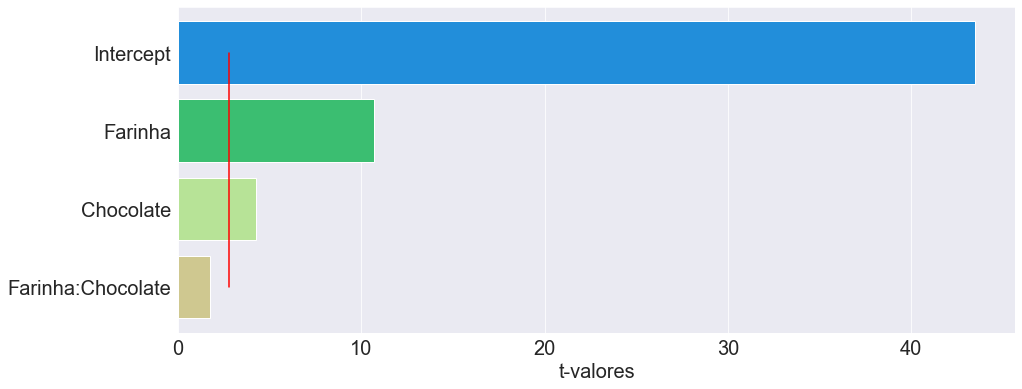

In [53]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
# inserindo o t tabelado
pareto.plot(limite, nome,'r')

github: https://github.com/vctgeraldo/planejamentoExperimentos/blob/Aula_3/Aula_3.zip

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

In [54]:
# dado que a interacao nao foi sig, podemos dropa-la

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [55]:
modelo_2=smf.ols(data=experimento, formula='Porcoes~Farinha+Chocolate')

In [56]:
modelo_ajustado_2=modelo_2.fit()

In [58]:
print(modelo_ajustado_2.summary())
# veja que os graus de liberdade aumentou para 5 pois tiramos um parametro 
#(8 obs-3 coef)

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           0.000571
Time:                        21:35:46   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [59]:
t_valores=modelo_ajustado_2.tvalues

In [60]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [61]:
nome=t_valores.index.tolist()

In [62]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [65]:
# t tabelado
distribuicao=stats.t(df=5)
# muda que agora temos 5 df

In [66]:
distribuicao.ppf(q=1-0.025)

2.5705818366147395

In [68]:
limite=[distribuicao.ppf(q=1-0.025)]*len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

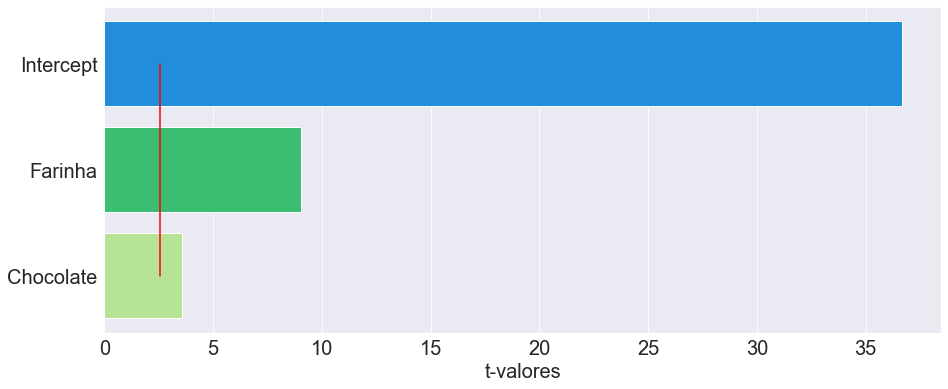

In [69]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
# inserindo o t tabelado
pareto.plot(limite, nome, 'r')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [ ]:
# sera que nosso modelo é representativo da realidade? para isso comparo
# valores preditos e observados. 

In [71]:
# valores observados
observados=experimento['Porcoes']

In [72]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [75]:
# valores preditos pelo modelo
preditos=modelo_ajustado_2.predict()

In [74]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [76]:
import matplotlib.pyplot as plt

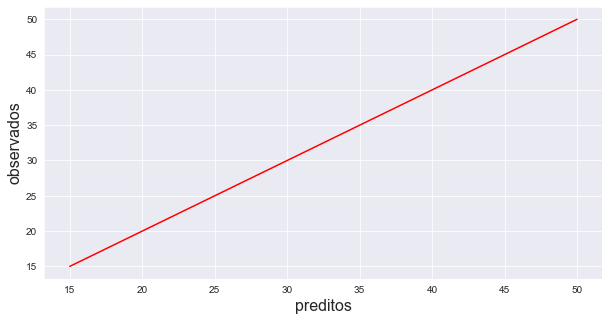

In [82]:
plt.figure(figsize=(10,5))
plt.xlabel('preditos', fontsize=16)
plt.ylabel('observados', fontsize=16)
# idealmente quero uma linha, ou seja valores preditos e observados iguais
x=np.linspace(start=15, stop=50, num=10) 
# esses limites sao baseados no valor max e min dos preditos acima
y=np.linspace(start=15, stop=50, num=10) 
plt.plot(x,y,'r')

# esse é o comportamento ideal

<hr>

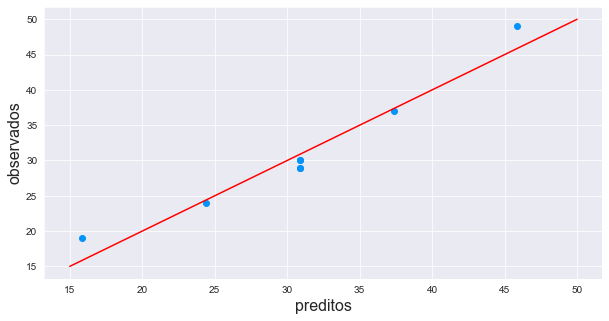

In [83]:
plt.figure(figsize=(10,5))
plt.xlabel('preditos', fontsize=16)
plt.ylabel('observados', fontsize=16)
x=np.linspace(start=15, stop=50, num=10) 
y=np.linspace(start=15, stop=50, num=10) 
plt.plot(x,y,'r')
# preditos vs observados
plt.scatter(preditos, observados)
# nosso modelo é entao representativo

In [84]:
# ao inves desse grafico podemos ver o R2
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           0.000571
Time:                        21:52:15   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\Ribeiro\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


github: https://github.com/vctgeraldo/planejamentoExperimentos/blob/Aula_4/Aula_4.zip

### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [85]:
parametros=modelo_ajustado_2.params

In [86]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [88]:
def modelo_receita(x_f,x_c):
    porcoes=parametros['Intercept']+parametros['Farinha']*x_f+parametros['Chocolate']*x_c
    
    return round(porcoes)


In [94]:
# aqui ela vai passar os valores que ela vai usar na receita

modelo_receita(-1,-1)
# vai fazer 16 cupcakes com -1 e -1 de farinha e choco.
# mas lembre que esses valores estao normalizados.
# como "desnormalizar"
# vamos fazer que ela dê o valor e a funcao interpole os valores para ela

16.0


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

In [102]:
def modelo_receita(x_f,x_c):
# limite dos ingredientes
    limite_normalizado = [-1,+1]
    limite_farinha = [0.5,1.5]
    limite_chocolate = [0.1,0.5]
# interpolar
    x_f_convertido=np.interp(x_f,limite_farinha,limite_normalizado)
    x_c_convertido=np.interp(x_c,limite_chocolate,limite_normalizado)


    porcoes=parametros['Intercept']+parametros['Farinha']*x_f_convertido+parametros['Chocolate']*x_c_convertido

    return round(porcoes)

In [104]:
modelo_receita(0.6,0.1)
# 18 cupcakes
# ou seja isso é uma ferramenta para predict o numero de cupcakes que ela 
# pode fazer ao simular a quantidade de ingredientes

18.0

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [105]:
# vamos usar um mapa de calor usando a qunatidade de cupcakes 
# produzidos nesses pontos



<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [107]:
x_farinha=np.linspace(start=0.5,stop=1.5,num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

### . 

In [108]:
x_chocolate=np.linspace(start=0.1,stop=0.5,num=10)
x_chocolate


array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [109]:
# vamos percorrer todos os pontos dessas listas
pontos=[]
# for vai primeiro percorrer toda lista, a quantidade, da farinha
for cont1 in x_farinha:
    # vamos gaurdar numa lista:
    temp=[]
    
    # vai ter um outro for que vai percorrer a respectiva quantidade de choco
    # assim, usando dois for vamos conseguir ver todos os pontos da area experimental
    for cont2 in x_chocolate:
        # chamar a funcao de choco e farinha
        # e add na lista que criamos acima
        temp.append(modelo_receita(cont1,cont2))
        # ao final de cada interacao vamos colocar esse temp na lista "pontos"
    pontos.append(temp)

In [111]:
pontos
# essa lista mostra a quantidade de cupcakes dentro da area quadrada do grafico, de experimentacao

[[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 22.0, 23.0, 24.0],
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0],
 [21.0, 22.0, 23.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0],
 [23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0],
 [28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 33.0, 34.0, 35.0, 36.0],
 [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
 [33.0, 34.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0],
 [35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 43.0],
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0]]

### .

### Construindo a superfície de resposta

In [112]:
# importar paleta de cor
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

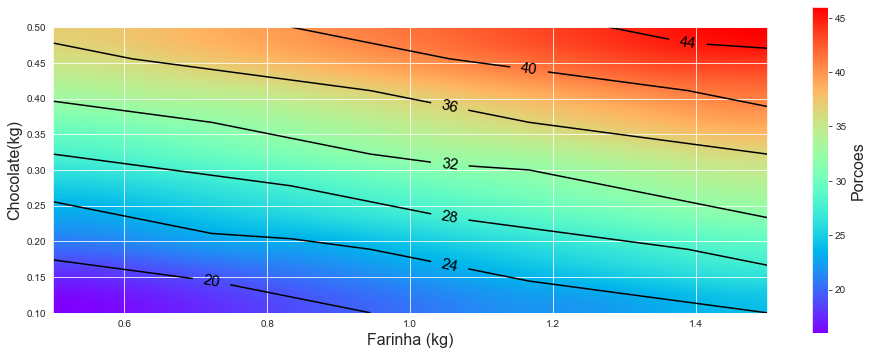

In [118]:
#base
plt.figure(figsize=(16,6))
plt.xlabel('Farinha (kg)', fontsize=16)
plt.ylabel('Chocolate(kg)',fontsize=16)

#mapa de cores
mapa_cor=plt.imshow(pontos,origin='lower',cmap=cm.rainbow, interpolation='quadric', extent=(0.5,1.5,0.1,0.5) )
#cmpa é a paleta de cores, depois definimos a interpolacao, extent sao os limites 

# barra de cor
plt.colorbar().set_label('Porcoes',fontsize=16)
# ou seja mais proximo de vermelho, maiores qtdades de cupcakes (ou seja mais farinha e choco da mais cupcakes)
# na area vermelha, por volta de 40 e poucos cupcakes e em azul por volta de 20

# linhas de guia
linhas=plt.contour(x_farinha,x_chocolate, pontos,colors='k',linewidths=1.5)
# add valores nas linhas
plt.clabel(linhas,inline=True, fmt='%1.0f',fontsize=15,inline_spacing=10)

In [119]:
# essas linhas representam onde a quantidade de cupcakes é igual
# por exemplo 32, em toda a extensao dessa linha, a Bel produz 32 cupcakes
# logo se ela usar x e y de farinha e choco ela produz 32 cupcakes.

#ISOLINHAS: isso facilita o trabalho da Bel, pois se ela tem ingridientes limitados
# de farinha por ex, ela pode ver quanto ela precisa de choco para produzir certo num de cupcakes

Versao final do projeto github: https://github.com/vctgeraldo/planejamentoExperimentos/blob/Final/Final.zip